# 1. Reading in Data and Libraries

## 1.1 Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import chardet
import seaborn as sns
import matplotlib.patches as mp
import matplotlib.pyplot as plt

## 1.2 Import Data

In [15]:
#reading in the qualitative dataset
df_qdm = pd.read_csv("qualitative_data_msba.csv")

#reading in the time series dataset
df_tsdm = pd.read_csv("time_series_data_msba.csv")

## 1.3 Cleaning Data

In [16]:
#Imputing Missing values with 'None' and 'Not Present' categories
df_qdm['rv_lanes_stack_type'] = df_qdm['rv_lanes_stack_type'].fillna('None')
df_qdm['hi_flow_rv_lanes_stack_type'] = df_qdm['hi_flow_rv_lanes_stack_type'].fillna('None')
df_qdm = df_qdm.fillna('Not Present')

In [17]:
# Separate variables into categorical and continuous
categorical_vars = ['lottery', 'freal', 'bonfire_grill', 'pizza', 'cinnabon', 'ethanol_free', 'hi_flow_lanes', 'rv_lanes', 'cat_scales', 'rv_dumps', 'propane', 'traditional_forecourt_layout', 'traditional_forecourt_stack_type', 'rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_layout', 'hi_flow_rv_lanes_layout']  # List to store categorical variable names
continuous_vars = ['open_year', 'years_since_last_project', 'lottery','square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income', 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions', 'rv_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions', 'mens_toilet_count', 'mens_urinal_count', 'womens_toilet_count', 'womens_sink_count', 'site_id_msba']   # List to store continuous variable names

In [18]:
from sklearn.preprocessing import LabelEncoder

# Use the 'categorical_vars' list to identify categorical columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column in 'categorical_vars'
for column in categorical_vars:
    if column in df_qdm.columns:
        df_qdm[column] = label_encoder.fit_transform(df_qdm[column])

# The categorical columns are now encoded with numerical values

# Display the first few rows of the DataFrame to verify
print(df_qdm.head())

   Unnamed: 0  open_year  square_feet  front_door_count  \
0           1       2021         5046                 2   
1           2       2021         5046                 2   
2           3       2021         5046                 2   
3           4       2021         5046                 2   
4           5       2021         5046                 2   

   years_since_last_project  parking_spaces  lottery  freal  bonfire_grill  \
0                         2              38        1      1              1   
1                         2              39        0      1              1   
2                         2              35        1      1              1   
3                         2              36        0      1              1   
4                         2              25        1      1              1   

   pizza  ...  rv_lanes_fueling_positions_2 hi_flow_rv_lanes_layout  \
0      0  ...                             6                       3   
1      1  ...                     

## 1.4 Merging the Datasets

In [19]:
#merging the two datasets
merged_df = pd.merge(df_tsdm, df_qdm, on='site_id_msba', how='inner')

In [20]:
#removing the un-named column from the data
merged_df.drop('Unnamed: 0_x', axis=1, inplace=True)
merged_df.drop('Unnamed: 0_y', axis=1, inplace=True)

#checking to make sure it was removed correctly
merged_df.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,5,4,0,HF/RV,No,Yes,1,1,2,2
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,5,4,0,HF/RV,No,Yes,1,1,2,2
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,5,4,0,HF/RV,No,Yes,1,1,2,2
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,5,4,0,HF/RV,No,Yes,1,1,2,2
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,5,4,0,HF/RV,No,Yes,1,1,2,2


In [21]:
#checking how many unique sites there are
num_distinct_values = merged_df['site_id_msba'].nunique()
print('There are', num_distinct_values, 'unique sites.')

There are 37 unique sites.


## 1.5 Adding a Day of Year Column to the Data

In [22]:
import pandas as pd

#converting the 'calendar.calendar_day_date' column to datetime
merged_df['calendar.calendar_day_date'] = pd.to_datetime(merged_df['calendar.calendar_day_date'])

#creating a new column 'day_of_year' with the day of the year
merged_df['day_of_year'] = merged_df['calendar.calendar_day_date'].dt.dayofyear

merged_df.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,day_of_year
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,4,0,HF/RV,No,Yes,1,1,2,2,168
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,4,0,HF/RV,No,Yes,1,1,2,2,173
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,4,0,HF/RV,No,Yes,1,1,2,2,174
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,4,0,HF/RV,No,Yes,1,1,2,2,177
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,4,0,HF/RV,No,Yes,1,1,2,2,178


## 1.6 Splitting Data into Training and Test set

First I need to randomly select 30 of the site_id_msba to be in the training data and the remaining 7 for the test data

In [23]:
import pandas as pd
import random

#getting the unique site IDs
unique_sites = merged_df['site_id_msba'].unique()

#shuffling the unique site IDs
random.shuffle(unique_sites)

#selecting the first 30 sites for training data
training_sites = unique_sites[:30]

#selecting the remaining 7 sites for testing data
testing_sites = unique_sites[30:]

print("Selected Sites for Training Data:", training_sites)
print("Selected Sites for Testing Data:", testing_sites)

Selected Sites for Training Data: [23135 22890 24535 23240 22785 22015 23765 22645 22925 22400 23380 22855
 22505 22750 22575 22540 24220 24150 22715 24255 22085 23730 22120 23660
 23345 23905 22680 23450 21980 21560]
Selected Sites for Testing Data: [22260 22820 22330 23835 23555 23415 23485]


In [24]:
#filtering the data and creating the train dataset 
train_data = merged_df[merged_df['site_id_msba'].isin(training_sites)]

train_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,day_of_year
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,...,4,0,HF/RV,No,Yes,1,1,2,2,168
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,...,4,0,HF/RV,No,Yes,1,1,2,2,173
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,...,4,0,HF/RV,No,Yes,1,1,2,2,174
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,...,4,0,HF/RV,No,Yes,1,1,2,2,177
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,...,4,0,HF/RV,No,Yes,1,1,2,2,178


In [25]:
#filtering the data and creating the test dataset
test_data = merged_df[merged_df['site_id_msba'].isin(testing_sites)]

test_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,day_of_year
1830,2022-05-10,2022-05-10,19,Tuesday,NONE,WEEKDAY,1960.3605,899.7380,969.6680,1028.5030,...,4,0,HF/RV,No,Yes,3,3,6,2,130
1831,2022-05-10,2022-05-15,20,Sunday,NONE,WEEKEND,2267.9335,719.6420,1233.9040,1615.1065,...,4,0,HF/RV,No,Yes,3,3,6,2,135
1832,2022-05-10,2022-05-17,20,Tuesday,NONE,WEEKDAY,1879.5840,763.8365,1558.9280,1129.3590,...,4,0,HF/RV,No,Yes,3,3,6,2,137
1833,2022-05-10,2022-05-25,21,Wednesday,NONE,WEEKDAY,1769.8590,602.2730,1755.2920,1533.3535,...,4,0,HF/RV,No,Yes,3,3,6,2,145
1834,2022-05-10,2022-05-26,21,Thursday,Ascension,WEEKDAY,2394.1190,740.7995,2227.5575,1675.0125,...,4,0,HF/RV,No,Yes,3,3,6,2,146


# 2. Linear Regression Model

## 2.1 Creating the Linear Model for daily_yoy_ndt.total_inside_sales

In [127]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copy = train_data.copy()
test_copy = test_data.copy()

#dropping the columns with date values
columns_to_drop = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba']
train_copy.drop(columns=columns_to_drop, inplace=True)
test_copy.drop(columns=columns_to_drop, inplace=True)

#performing one-hot encoding for categorical variables
train_copy = pd.get_dummies(train_copy)
test_copy = pd.get_dummies(test_copy)


#creating the linear regression object
model = LinearRegression()

#fitting the model using the training data
X_train = train_copy.drop(columns=['daily_yoy_ndt.total_inside_sales'])
y_train = train_copy['daily_yoy_ndt.total_inside_sales']
model.fit(X_train, y_train)

#making predictions on the test data
X_test = test_copy.drop(columns=['daily_yoy_ndt.total_inside_sales'])
y_test = test_copy['daily_yoy_ndt.total_inside_sales']
predictions = model.predict(X_test)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, predictions)))
print('R Squared: %.2f' % r2_score(y_test, predictions))

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print(results.summary())  

Mean squared error: 3262289.29
Root Mean squared error: 1806.18
R Squared: -2.64
                                   OLS Regression Results                                   
Dep. Variable:     daily_yoy_ndt.total_inside_sales   R-squared:                       0.933
Model:                                          OLS   Adj. R-squared:                  0.933
Method:                               Least Squares   F-statistic:                     2338.
Date:                              Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                                      23:21:43   Log-Likelihood:                -76499.
No. Observations:                             10980   AIC:                         1.531e+05
Df Residuals:                                 10914   BIC:                         1.536e+05
Df Model:                                        65                                         
Covariance Type:                          nonrobust                               

This initial model did not perform well (rmse = 1806), and the notes suggest strong multicollinearity problems. Lets try running a Ridge Regression model to see which features have high VIF.

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge


#implementing Ridge Regression
ridge_model = Ridge(alpha=0.6)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

#results
print('Ridge Mean squared error: %.2f' % mean_squared_error(y_test, ridge_predictions))
print('Ridge Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, ridge_predictions)))
print('Ridge R Squared: %.2f' % ridge_model.score(X_test, y_test))

#calculating VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)


#identifying features with high VIF values
high_vif_features = vif[vif["VIF Factor"] > 10]["features"]
print("Features with high VIF:")
print(high_vif_features)

Ridge Mean squared error: 3231569.41
Ridge Root Mean squared error: 1797.66
Ridge R Squared: -2.61


C:\Users\jital\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\jital\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                              features
0   9.252745e+01      calendar.fiscal_week_id_for_year
1   5.414820e+00      daily_yoy_ndt.total_food_service
2   5.801902e+00                              diesel_x
3   5.819312e+00                              unleaded
4   1.801440e+15                             open_year
..           ...                                   ...
92           inf  hi_flow_lanes_stack_type_Not Present
93           inf     hi_flow_rv_lanes_stack_type_HF/RV
94           inf      hi_flow_rv_lanes_stack_type_None
95  0.000000e+00                        non_24_hour_No
96  0.000000e+00                    self_check_out_Yes

[97 rows x 2 columns]
Features with high VIF:
0         calendar.fiscal_week_id_for_year
4                                open_year
5                              square_feet
7                 years_since_last_project
8                           parking_spaces
                      ...                 
88                                 

Now that we have seen the VIF factor for each feature, lets try a model that removes the features with high VIFs.

In [129]:
#removing features with high VIF values
X_train_low_vif = X_train.drop(high_vif_features, axis=1)
X_test_low_vif = X_test.drop(high_vif_features, axis=1)

#refitting the model using the updated datasets
model.fit(X_train_low_vif, y_train)

#making predictions on the test data
predictions_low_vif = model.predict(X_test_low_vif)

#results
print('Mean squared error (after removing high VIF features): %.2f' % mean_squared_error(y_test, predictions_low_vif))
print('Root Mean squared error (after removing high VIF features): %.2f' % np.sqrt(mean_squared_error(y_test, predictions_low_vif)))
print('R Squared (after removing high VIF features): %.2f' % r2_score(y_test, predictions_low_vif))

X_train_sm_low_vif = sm.add_constant(X_train_low_vif)
model_sm_low_vif = sm.OLS(y_train, X_train_sm_low_vif)
results_low_vif = model_sm_low_vif.fit()
print(results_low_vif.summary())  

Mean squared error (after removing high VIF features): 308684.84
Root Mean squared error (after removing high VIF features): 555.59
R Squared (after removing high VIF features): 0.66
                                   OLS Regression Results                                   
Dep. Variable:     daily_yoy_ndt.total_inside_sales   R-squared:                       0.808
Model:                                          OLS   Adj. R-squared:                  0.808
Method:                               Least Squares   F-statistic:                 1.535e+04
Date:                              Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                                      23:22:18   Log-Likelihood:                -82291.
No. Observations:                             10980   AIC:                         1.646e+05
Df Residuals:                                 10976   BIC:                         1.646e+05
Df Model:                                         3                      

The model removing features with high VIF, performed a lot better than the previous model. RMSE went from 1806 to 555. However, this model still has high error metric scores. Hopefully a Random Forest model will perform better.

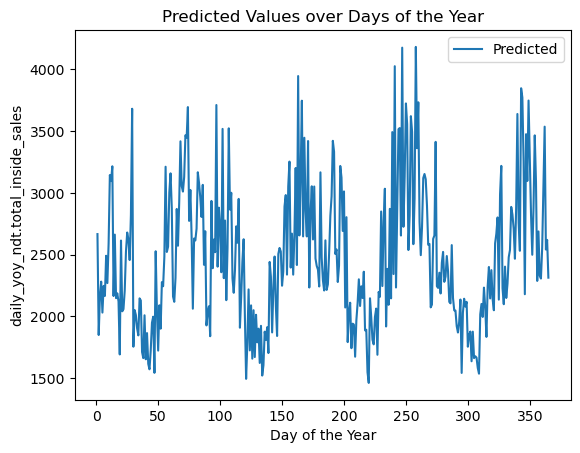

In [130]:
import matplotlib.pyplot as plt
import numpy as np

#creating a range of days from 1 through 365
days = np.arange(1, 366)

#slicing the predictions to match the length of the days array
predictions_sliced = predictions_low_vif[:len(days)]

#plotting the predicted values
plt.plot(days, predictions_sliced, label='Predicted')

#setting the title and labels
plt.title('Predicted Values over Days of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('daily_yoy_ndt.total_inside_sales') 

#the graph
plt.legend()
plt.show()

## 2.2 Creating the Linear Model for daily_yoy_ndt.total_food_service

In [131]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copy2 = train_data.copy()
test_copy2 = test_data.copy()

#dropping the columns with date values
columns_to_drop = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba']
train_copy2.drop(columns=columns_to_drop, inplace=True)
test_copy2.drop(columns=columns_to_drop, inplace=True)

#performing one-hot encoding for categorical variables
train_copy2 = pd.get_dummies(train_copy2)
test_copy2 = pd.get_dummies(test_copy2)


#creating the linear regression object
model2 = LinearRegression()

#fitting the model using the training data
X_train2 = train_copy2.drop(columns=['daily_yoy_ndt.total_food_service'])
y_train2 = train_copy2['daily_yoy_ndt.total_food_service']
model2.fit(X_train2, y_train2)

#making predictions on the test data
X_test2 = test_copy2.drop(columns=['daily_yoy_ndt.total_food_service'])
y_test2 = test_copy2['daily_yoy_ndt.total_food_service']
predictions2 = model2.predict(X_test2)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_test2, predictions2))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test2, predictions2)))
print('R Squared: %.2f' % r2_score(y_test2, predictions2))

X_train_sm2 = sm.add_constant(X_train2)
model_sm2 = sm.OLS(y_train2, X_train_sm2)
results2 = model_sm2.fit()
print(results2.summary())  

Mean squared error: 149964.25
Root Mean squared error: 387.25
R Squared: -0.40
                                   OLS Regression Results                                   
Dep. Variable:     daily_yoy_ndt.total_food_service   R-squared:                       0.944
Model:                                          OLS   Adj. R-squared:                  0.943
Method:                               Least Squares   F-statistic:                     2810.
Date:                              Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                                      23:23:04   Log-Likelihood:                -63894.
No. Observations:                             10980   AIC:                         1.279e+05
Df Residuals:                                 10914   BIC:                         1.284e+05
Df Model:                                        65                                         
Covariance Type:                          nonrobust                                 

This initial model did not perform well (rmse = 387), and the notes suggest strong multicollinearity problems. However, it did perform better than the model for daily_yoy_ndt.total_inside_sales. Lets try running a Ridge Regression model to see which features have high VIF.

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge


#implementing Ridge Regression
ridge_model2 = Ridge(alpha=0.6)
ridge_model2.fit(X_train2, y_train2)
ridge_predictions2 = ridge_model2.predict(X_test2)

#results
print('Ridge Mean squared error: %.2f' % mean_squared_error(y_test2, ridge_predictions2))
print('Ridge Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test2, ridge_predictions2)))
print('Ridge R Squared: %.2f' % ridge_model2.score(X_test2, y_test2))

#calculating VIF
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif2["features"] = X_train2.columns
print(vif2)


#identifying features with high VIF values
high_vif_features2 = vif2[vif2["VIF Factor"] > 10]["features"]
print("Features with high VIF:")
print(high_vif_features2)

Ridge Mean squared error: 147775.15
Ridge Root Mean squared error: 384.42
Ridge R Squared: -0.38


C:\Users\jital\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\jital\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                              features
0   9.253023e+01      calendar.fiscal_week_id_for_year
1   4.556521e+00      daily_yoy_ndt.total_inside_sales
2   5.779275e+00                              diesel_x
3   6.613592e+00                              unleaded
4   3.002400e+15                             open_year
..           ...                                   ...
92           inf  hi_flow_lanes_stack_type_Not Present
93           inf     hi_flow_rv_lanes_stack_type_HF/RV
94           inf      hi_flow_rv_lanes_stack_type_None
95  0.000000e+00                        non_24_hour_No
96  0.000000e+00                    self_check_out_Yes

[97 rows x 2 columns]
Features with high VIF:
0         calendar.fiscal_week_id_for_year
4                                open_year
5                              square_feet
7                 years_since_last_project
8                           parking_spaces
                      ...                 
88                                 

Now that we have seen the VIF factor for each feature, lets try a model that removes the features with high VIFs.

In [133]:
#removing features with high VIF values
X_train_low_vif2 = X_train2.drop(high_vif_features2, axis=1)
X_test_low_vif2 = X_test2.drop(high_vif_features2, axis=1)

#refitting the model using the updated datasets
model2.fit(X_train_low_vif2, y_train2)

#making predictions on the test data
predictions_low_vif2 = model2.predict(X_test_low_vif2)

#results
print('Mean squared error (after removing high VIF features): %.2f' % mean_squared_error(y_test2, predictions_low_vif2))
print('Root Mean squared error (after removing high VIF features): %.2f' % np.sqrt(mean_squared_error(y_test2, predictions_low_vif2)))
print('R Squared (after removing high VIF features): %.2f' % r2_score(y_test2, predictions_low_vif2))

X_train_sm_low_vif2 = sm.add_constant(X_train_low_vif2)
model_sm_low_vif2 = sm.OLS(y_train2, X_train_sm_low_vif2)
results_low_vif2 = model_sm_low_vif2.fit()
print(results_low_vif2.summary())  

Mean squared error (after removing high VIF features): 55279.02
Root Mean squared error (after removing high VIF features): 235.11
R Squared (after removing high VIF features): 0.48
                                   OLS Regression Results                                   
Dep. Variable:     daily_yoy_ndt.total_food_service   R-squared:                       0.838
Model:                                          OLS   Adj. R-squared:                  0.838
Method:                               Least Squares   F-statistic:                 1.898e+04
Date:                              Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                                      23:23:41   Log-Likelihood:                -69676.
No. Observations:                             10980   AIC:                         1.394e+05
Df Residuals:                                 10976   BIC:                         1.394e+05
Df Model:                                         3                       

The model removing features with high VIF, performed a lot better than the previous model. RMSE went from 387 to 235. However, this model still has high error metric scores. Hopefully a Random Forest model will perform better.

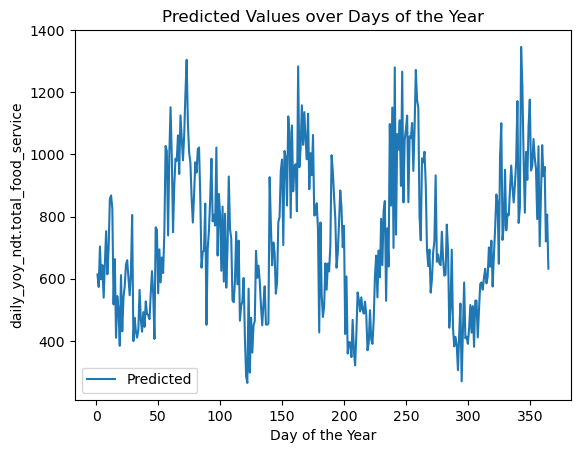

In [134]:
import matplotlib.pyplot as plt
import numpy as np

#creating a range of days from 1 through 365
days = np.arange(1, 366)

#slicing the predictions to match the length of the days array
predictions_sliced2 = predictions_low_vif2[:len(days)]

#plotting the predicted values
plt.plot(days, predictions_sliced2, label='Predicted')

#setting the title and labels
plt.title('Predicted Values over Days of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('daily_yoy_ndt.total_food_service')

#the graph
plt.legend()
plt.show()

## 2.3 Creating the Linear Model for diesel

In [140]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copy3 = train_data.copy()
test_copy3 = test_data.copy()

#dropping the columns with date values
columns_to_drop = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba']
train_copy3.drop(columns=columns_to_drop, inplace=True)
test_copy3.drop(columns=columns_to_drop, inplace=True)

#performing one-hot encoding for categorical variables
train_copy3 = pd.get_dummies(train_copy3)
test_copy3 = pd.get_dummies(test_copy3)


#creating the linear regression object
model3 = LinearRegression()

#fitting the model using the training data
X_train3 = train_copy3.drop(columns=['diesel_x'])
y_train3 = train_copy3['diesel_x']
model3.fit(X_train3, y_train3)

#making predictions on the test data
X_test3 = test_copy3.drop(columns=['diesel_x'])
y_test3 = test_copy3['diesel_x']
predictions3 = model3.predict(X_test3)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_test3, predictions3))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test3, predictions3)))
print('R Squared: %.2f' % r2_score(y_test3, predictions3))

X_train_sm3 = sm.add_constant(X_train3)
model_sm3 = sm.OLS(y_train3, X_train_sm3)
results3 = model_sm3.fit()
print(results3.summary())  

Mean squared error: 12892766.56
Root Mean squared error: 3590.65
R Squared: 0.12
                            OLS Regression Results                            
Dep. Variable:               diesel_x   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     817.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:25:10   Log-Likelihood:                -83723.
No. Observations:               10980   AIC:                         1.676e+05
Df Residuals:                   10914   BIC:                         1.681e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------

This initial model did not perform well (rmse = 3590), and the notes suggest strong multicollinearity problems. Of the three initial models, this one performed the worst. Lets try running a Ridge Regression model to see which features have high VIF.

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge


#implementing Ridge Regression
ridge_model3 = Ridge(alpha=0.6)  
ridge_model3.fit(X_train3, y_train3)
ridge_predictions3 = ridge_model3.predict(X_test3)

#results
print('Ridge Mean squared error: %.2f' % mean_squared_error(y_test3, ridge_predictions3))
print('Ridge Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test3, ridge_predictions3)))
print('Ridge R Squared: %.2f' % ridge_model3.score(X_test3, y_test3))

#calculating VIF
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif3["features"] = X_train3.columns
print(vif3)


#identifying features with high VIF values
high_vif_features3 = vif3[vif3["VIF Factor"] > 10]["features"]
print("Features with high VIF:")
print(high_vif_features3)

Ridge Mean squared error: 12825174.05
Ridge Root Mean squared error: 3581.23
Ridge R Squared: 0.13


C:\Users\jital\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\jital\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                              features
0   9.253563e+01      calendar.fiscal_week_id_for_year
1   1.474998e+01      daily_yoy_ndt.total_inside_sales
2   1.746003e+01      daily_yoy_ndt.total_food_service
3   6.629544e+00                              unleaded
4   4.503600e+15                             open_year
..           ...                                   ...
92           inf  hi_flow_lanes_stack_type_Not Present
93           inf     hi_flow_rv_lanes_stack_type_HF/RV
94           inf      hi_flow_rv_lanes_stack_type_None
95  0.000000e+00                        non_24_hour_No
96  0.000000e+00                    self_check_out_Yes

[97 rows x 2 columns]
Features with high VIF:
0         calendar.fiscal_week_id_for_year
1         daily_yoy_ndt.total_inside_sales
2         daily_yoy_ndt.total_food_service
4                                open_year
5                              square_feet
                      ...                 
88                                 

Now that we have seen the VIF factor for each feature, lets try a model that removes the features with high VIFs.

In [142]:
#removing features with high VIF values
X_train_low_vif3 = X_train3.drop(high_vif_features3, axis=1)
X_test_low_vif3 = X_test3.drop(high_vif_features3, axis=1)

#refitting the model using the updated datasets
model3.fit(X_train_low_vif3, y_train3)

#making predictions on the test data
predictions_low_vif3 = model3.predict(X_test_low_vif3)

#results
print('Mean squared error (after removing high VIF features): %.2f' % mean_squared_error(y_test3, predictions_low_vif3))
print('Root Mean squared error (after removing high VIF features): %.2f' % np.sqrt(mean_squared_error(y_test3, predictions_low_vif3)))
print('R Squared (after removing high VIF features): %.2f' % r2_score(y_test3, predictions_low_vif3))

X_train_sm_low_vif3 = sm.add_constant(X_train_low_vif3)
model_sm_low_vif3 = sm.OLS(y_train3, X_train_sm_low_vif3)
results_low_vif3 = model_sm_low_vif3.fit()
print(results_low_vif3.summary())  

Mean squared error (after removing high VIF features): 19636308.01
Root Mean squared error (after removing high VIF features): 4431.29
R Squared (after removing high VIF features): -0.34
                            OLS Regression Results                            
Dep. Variable:               diesel_x   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.16e-31
Time:                        23:26:02   Log-Likelihood:                -93371.
No. Observations:               10980   AIC:                         1.867e+05
Df Residuals:                   10978   BIC:                         1.868e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       

The model removing features with high VIF, performed worse than the previous model. RMSE went from 3590 to 4431. Some how this model performed worse than its initial model. Hopefully a Random Forest model will perform better.

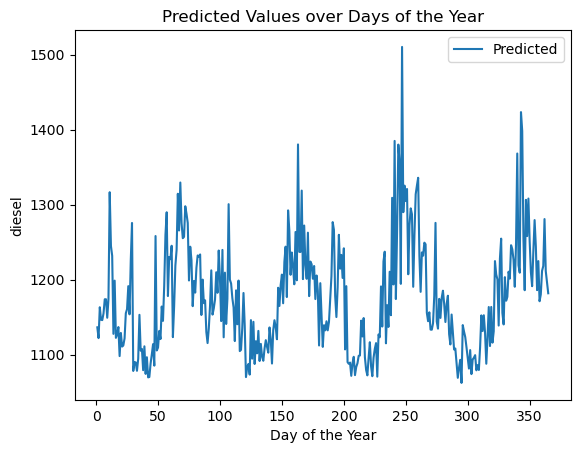

In [143]:
import matplotlib.pyplot as plt
import numpy as np

#creating a range of days from 1 through 365
days = np.arange(1, 366)

#slicing the predictions to match the length of the days array
predictions_sliced3 = predictions_low_vif3[:len(days)]

#plotting the predicted values
plt.plot(days, predictions_sliced3, label='Predicted')

#setting the title and labels
plt.title('Predicted Values over Days of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('diesel')

#the graph
plt.legend()
plt.show()

## 2.4 Creating the Linear Model for unleaded

In [147]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copy4 = train_data.copy()
test_copy4 = test_data.copy()

#dropping the columns with date values
columns_to_drop = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba']
train_copy4.drop(columns=columns_to_drop, inplace=True)
test_copy4.drop(columns=columns_to_drop, inplace=True)

#performing one-hot encoding for categorical variables
train_copy4 = pd.get_dummies(train_copy4)
test_copy4 = pd.get_dummies(test_copy4)


#creating the linear regression object
model4 = LinearRegression()

#fitting the model using the training data
X_train4 = train_copy4.drop(columns=['unleaded'])
y_train4 = train_copy4['unleaded']
model4.fit(X_train4, y_train4)

#making predictions on the test data
X_test4 = test_copy4.drop(columns=['unleaded'])
y_test4 = test_copy4['unleaded']
predictions4 = model4.predict(X_test4)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_test4, predictions4))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test4, predictions4)))
print('R Squared: %.2f' % r2_score(y_test4, predictions4))

X_train_sm4 = sm.add_constant(X_train4)
model_sm4 = sm.OLS(y_train4, X_train_sm4)
results4 = model_sm4.fit()
print(results4.summary())  

Mean squared error: 18539298.70
Root Mean squared error: 4305.73
R Squared: -24.25
                            OLS Regression Results                            
Dep. Variable:               unleaded   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     947.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:27:43   Log-Likelihood:                -81768.
No. Observations:               10980   AIC:                         1.637e+05
Df Residuals:                   10914   BIC:                         1.642e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------

This initial model did not perform well (rmse = 4305), and the notes suggest strong multicollinearity problems. Of the four initial models, this one performed the worst. Lets try running a Ridge Regression model to see which features have high VIF.

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge


#implementing Ridge Regression
ridge_model4 = Ridge(alpha=0.6)  
ridge_model4.fit(X_train4, y_train4)
ridge_predictions4 = ridge_model4.predict(X_test4)

#results
print('Ridge Mean squared error: %.2f' % mean_squared_error(y_test4, ridge_predictions4))
print('Ridge Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test4, ridge_predictions4)))
print('Ridge R Squared: %.2f' % ridge_model4.score(X_test4, y_test4))

#calculating VIF
vif4 = pd.DataFrame()
vif4["VIF Factor"] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif4["features"] = X_train4.columns
print(vif4)


#identifying features with high VIF values
high_vif_features4 = vif4[vif4["VIF Factor"] > 10]["features"]
print("Features with high VIF:")
print(high_vif_features4)

Ridge Mean squared error: 18235594.76
Ridge Root Mean squared error: 4270.32
Ridge R Squared: -23.84


C:\Users\jital\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\jital\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


      VIF Factor                              features
0   9.253678e+01      calendar.fiscal_week_id_for_year
1   1.307511e+01      daily_yoy_ndt.total_inside_sales
2   1.765882e+01      daily_yoy_ndt.total_food_service
3   5.859174e+00                              diesel_x
4   9.007199e+15                             open_year
..           ...                                   ...
92           inf  hi_flow_lanes_stack_type_Not Present
93           inf     hi_flow_rv_lanes_stack_type_HF/RV
94           inf      hi_flow_rv_lanes_stack_type_None
95  0.000000e+00                        non_24_hour_No
96  0.000000e+00                    self_check_out_Yes

[97 rows x 2 columns]
Features with high VIF:
0         calendar.fiscal_week_id_for_year
1         daily_yoy_ndt.total_inside_sales
2         daily_yoy_ndt.total_food_service
4                                open_year
5                              square_feet
                      ...                 
88                                 

Now that we have seen the VIF factor for each feature, lets try a model that removes the features with high VIFs.

In [149]:
#removing features with high VIF values
X_train_low_vif4 = X_train4.drop(high_vif_features4, axis=1)
X_test_low_vif4 = X_test4.drop(high_vif_features4, axis=1)

#refitting the model using the updated datasets
model4.fit(X_train_low_vif4, y_train4)

#making predictions on the test data
predictions_low_vif4 = model4.predict(X_test_low_vif4)

#results
print('Mean squared error (after removing high VIF features): %.2f' % mean_squared_error(y_test4, predictions_low_vif4))
print('Root Mean squared error (after removing high VIF features): %.2f' % np.sqrt(mean_squared_error(y_test4, predictions_low_vif4)))
print('R Squared (after removing high VIF features): %.2f' % r2_score(y_test4, predictions_low_vif4))

X_train_sm_low_vif4 = sm.add_constant(X_train_low_vif4)
model_sm_low_vif4 = sm.OLS(y_train4, X_train_sm_low_vif4)
results_low_vif4 = model_sm_low_vif4.fit()
print(results_low_vif4.summary())  

Mean squared error (after removing high VIF features): 761533.91
Root Mean squared error (after removing high VIF features): 872.66
R Squared (after removing high VIF features): -0.04
                            OLS Regression Results                            
Dep. Variable:               unleaded   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.16e-31
Time:                        23:30:59   Log-Likelihood:                -92095.
No. Observations:               10980   AIC:                         1.842e+05
Df Residuals:                   10978   BIC:                         1.842e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          

The model removing features with high VIF, performed a lot better than the previous model. RMSE went from 4305 to 872. Hopefully a Random Forest model will perform better.

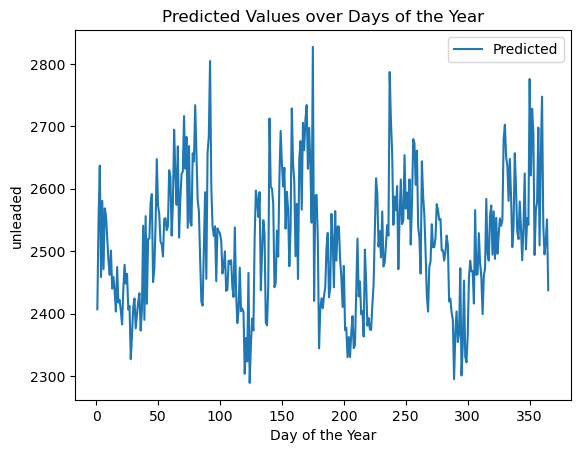

In [150]:
import matplotlib.pyplot as plt
import numpy as np

#creating a range of days from 1 through 365
days = np.arange(1, 366)

#slicing the predictions to match the length of the days array
predictions_sliced4 = predictions_low_vif4[:len(days)]

#plotting the predicted values
plt.plot(days, predictions_sliced4, label='Predicted')

#setting the title and labels
plt.title('Predicted Values over Days of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('unleaded')

#the graph
plt.legend()
plt.show()

Since Linear regression models didn't perform too well. We will see if a Random Forest model can yield better results

# 3. Random Forest Models

## 3.1 Creating the Random Forest Model for daily_yoy_ndt.total_inside_sales

In [26]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copyrf = train_data.copy()
test_copyrf = test_data.copy()

#dropping the columns with date values
columns_to_drop = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba', 
'daily_yoy_ndt.total_food_service', 'diesel_x', 'unleaded']
train_copyrf.drop(columns=columns_to_drop, inplace=True)
test_copyrf.drop(columns=columns_to_drop, inplace=True)

#performing one-hot encoding for categorical variables
train_copyrf = pd.get_dummies(train_copyrf)
test_copyrf = pd.get_dummies(test_copyrf)

#creating the Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#fitting the model using the training data
X_trainrf = train_copyrf.drop(columns=['daily_yoy_ndt.total_inside_sales'])
y_trainrf = train_copyrf['daily_yoy_ndt.total_inside_sales']
rf_model.fit(X_trainrf, y_trainrf)

#making predictions on the test data
X_testrf = test_copyrf.drop(columns=['daily_yoy_ndt.total_inside_sales'])
y_testrf = test_copyrf['daily_yoy_ndt.total_inside_sales']
rf_predictions = rf_model.predict(X_testrf)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_testrf, rf_predictions))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf, rf_predictions)))
print('R Squared: %.2f' % r2_score(y_testrf, rf_predictions))

Mean squared error: 656847.56
Root Mean squared error: 810.46
R Squared: 0.22


This initial Random Forest model got an RMSE of 810, which is less than the 1806 rmse of the initial linear model. Lets see if hyperparameter tuning can improve the model.

In [27]:
from sklearn.model_selection import GridSearchCV

#defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#initializing the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

#fitting the grid search to the data
grid_search.fit(X_trainrf, y_trainrf)

#getting the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#refitting the model using the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_trainrf, y_trainrf)

#making predictions on the test data with the refined model
best_rf_predictions = best_rf_model.predict(X_testrf)

#results
print('Refined Model Results:')
print('Mean squared error: %.2f' % mean_squared_error(y_testrf, best_rf_predictions))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf, best_rf_predictions)))
print('R Squared: %.2f' % r2_score(y_testrf, best_rf_predictions))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Refined Model Results:
Mean squared error: 621285.06
Root Mean squared error: 788.22
R Squared: 0.26


 The model with hyperparameter tuning got a rmse of 788, which is slightly lower than the initial model (810). It seems like tuning was only a little helpful.

## 3.2 Creating the Random Forest Model for daily_yoy_ndt.total_food_service

In [29]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copyrf2 = train_data.copy()
test_copyrf2 = test_data.copy()

#dropping the columns with date values
columns_to_drop2 = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba', 
'daily_yoy_ndt.total_inside_sales', 'diesel_x', 'unleaded']
train_copyrf2.drop(columns=columns_to_drop2, inplace=True)
test_copyrf2.drop(columns=columns_to_drop2, inplace=True)

#performing one-hot encoding for categorical variables
train_copyrf2 = pd.get_dummies(train_copyrf2)
test_copyrf2 = pd.get_dummies(test_copyrf2)

#creating the Random Forest
rf_model2 = RandomForestRegressor(n_estimators=50, random_state=40)

#fitting the model using the training data
X_trainrf2 = train_copyrf2.drop(columns=['daily_yoy_ndt.total_food_service'])
y_trainrf2 = train_copyrf2['daily_yoy_ndt.total_food_service']
rf_model2.fit(X_trainrf2, y_trainrf2)

#making predictions on the test data
X_testrf2 = test_copyrf2.drop(columns=['daily_yoy_ndt.total_food_service'])
y_testrf2 = test_copyrf2['daily_yoy_ndt.total_food_service']
rf_predictions2 = rf_model2.predict(X_testrf2)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_testrf2, rf_predictions2))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf2, rf_predictions2)))
print('R Squared: %.2f' % r2_score(y_testrf2, rf_predictions2))

Mean squared error: 47681.36
Root Mean squared error: 218.36
R Squared: 0.57


This initial Random Forest model got an RMSE of 218, which is less than the 387 rmse of the initial linear model.

In [33]:
from sklearn.model_selection import GridSearchCV

#defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#initializing the GridSearchCV object
grid_search2 = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

#fitting the grid search to the data
grid_search2.fit(X_trainrf2, y_trainrf2)

#getting the best parameters
best_params2 = grid_search2.best_params_
print("Best Parameters:", best_params2)

#refitting the model using the best parameters
best_rf_model2 = RandomForestRegressor(**best_params2, random_state=40)
best_rf_model2.fit(X_trainrf2, y_trainrf2)

#making predictions on the test data with the refined model
best_rf_predictions2 = best_rf_model2.predict(X_testrf2)

#results
print('Refined Model Results:')
print('Mean squared error: %.2f' % mean_squared_error(y_testrf2, best_rf_predictions2))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf2, best_rf_predictions2)))
print('R Squared: %.2f' % r2_score(y_testrf2, best_rf_predictions2))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Refined Model Results:
Mean squared error: 47230.02
Root Mean squared error: 217.32
R Squared: 0.57


 The model with hyperparameter tuning got a rmse of 217, which is slightly lower than the initial model (218). It seems like tuning was barely helpful in this case.

## 3.3 Creating the Random Forest Model for diesel

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copyrf3 = train_data.copy()
test_copyrf3 = test_data.copy()

#dropping the columns with date values
columns_to_drop3 = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba', 
'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'unleaded']
train_copyrf3.drop(columns=columns_to_drop3, inplace=True)
test_copyrf3.drop(columns=columns_to_drop3, inplace=True)

#performing one-hot encoding for categorical variables
train_copyrf3 = pd.get_dummies(train_copyrf3)
test_copyrf3 = pd.get_dummies(test_copyrf3)

#creating the Random Forest
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=40)

#fitting the model using the training data
X_trainrf3 = train_copyrf3.drop(columns=['diesel_x'])
y_trainrf3 = train_copyrf3['diesel_x']
rf_model3.fit(X_trainrf3, y_trainrf3)

#making predictions on the test data
X_testrf3 = test_copyrf3.drop(columns=['diesel_x'])
y_testrf3 = test_copyrf3['diesel_x']
rf_predictions3 = rf_model3.predict(X_testrf3)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_testrf3, rf_predictions3))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf3, rf_predictions3)))
print('R Squared: %.2f' % r2_score(y_testrf3, rf_predictions3))

Mean squared error: 1529724.62
Root Mean squared error: 1236.82
R Squared: 0.32


This initial Random Forest model got an RMSE of 1236, which is less than the 3590 rmse of the initial linear model.

In [32]:
from sklearn.model_selection import GridSearchCV

#defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#initializing the GridSearchCV object
grid_search3 = GridSearchCV(estimator=rf_model3, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

#fitting the grid search to the data
grid_search3.fit(X_trainrf3, y_trainrf3)

#getting the best parameters
best_params3 = grid_search3.best_params_
print("Best Parameters:", best_params3)

#refitting the model using the best parameters
best_rf_model3 = RandomForestRegressor(**best_params3, random_state=40)
best_rf_model3.fit(X_trainrf3, y_trainrf3)

#making predictions on the test data with the refined model
best_rf_predictions3 = best_rf_model3.predict(X_testrf3)

#results
print('Refined Model Results:')
print('Mean squared error: %.2f' % mean_squared_error(y_testrf3, best_rf_predictions3))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf3, best_rf_predictions3)))
print('R Squared: %.2f' % r2_score(y_testrf3, best_rf_predictions3))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Refined Model Results:
Mean squared error: 1505394.43
Root Mean squared error: 1226.95
R Squared: 0.33


 The model with hyperparameter tuning got a rmse of 1226, which is slightly lower than the initial model (1236). It seems like tuning was only slightly helpful in this case.

## 3.4 Creating the Random Forest Model for unleaded

In [34]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#creating a copy of merged_df
train_copyrf4 = train_data.copy()
test_copyrf4 = test_data.copy()

#dropping the columns with date values
columns_to_drop4 = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'site_id_msba', 
'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel_x']
train_copyrf4.drop(columns=columns_to_drop4, inplace=True)
test_copyrf4.drop(columns=columns_to_drop4, inplace=True)

#performing one-hot encoding for categorical variables
train_copyrf4 = pd.get_dummies(train_copyrf4)
test_copyrf4 = pd.get_dummies(test_copyrf4)

#creating the Random Forest
rf_model4 = RandomForestRegressor(n_estimators=100, random_state=40)

#fitting the model using the training data
X_trainrf4 = train_copyrf4.drop(columns=['unleaded'])
y_trainrf4 = train_copyrf4['unleaded']
rf_model4.fit(X_trainrf4, y_trainrf4)

#making predictions on the test data
X_testrf4 = test_copyrf4.drop(columns=['unleaded'])
y_testrf4 = test_copyrf4['unleaded']
rf_predictions4 = rf_model4.predict(X_testrf4)

#results
print('Mean squared error: %.2f' % mean_squared_error(y_testrf4, rf_predictions4))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf4, rf_predictions4)))
print('R Squared: %.2f' % r2_score(y_testrf4, rf_predictions4))

Mean squared error: 3666513.36
Root Mean squared error: 1914.81
R Squared: -0.82


This initial Random Forest model got an RMSE of 1914, which is way less than the 4305 rmse of the initial linear model.

In [35]:
from sklearn.model_selection import GridSearchCV

#defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#initializing the GridSearchCV object
grid_search4 = GridSearchCV(estimator=rf_model4, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

#fitting the grid search to the data
grid_search4.fit(X_trainrf4, y_trainrf4)

#getting the best parameters
best_params4 = grid_search4.best_params_
print("Best Parameters:", best_params4)

#refitting the model using the best parameters
best_rf_model4 = RandomForestRegressor(**best_params4, random_state=40)
best_rf_model4.fit(X_trainrf4, y_trainrf4)

#making predictions on the test data with the refined model
best_rf_predictions4 = best_rf_model4.predict(X_testrf4)

#results
print('Refined Model Results:')
print('Mean squared error: %.2f' % mean_squared_error(y_testrf4, best_rf_predictions4))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_testrf4, best_rf_predictions4)))
print('R Squared: %.2f' % r2_score(y_testrf4, best_rf_predictions4))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Refined Model Results:
Mean squared error: 3582945.21
Root Mean squared error: 1892.87
R Squared: -0.78


 The model with hyperparameter tuning got a rmse of 1892, which is slightly lower than the initial model (1914). It seems like tuning was only slightly helpful in this case.

# 4. Results

## 4.1 Linear Regression Best Model

In [4]:
from tabulate import tabulate

data = [
    ['daily_yoy_ndt.total_inside_sales', '308684.84', '555.59','0.66'],
    ['daily_yoy_ndt.total_food_service', '55279.02', '235.11', '0.48'],
    ['Diesel', '19636308.01', '4431.29', '-0.34'],
    ['Unleaded', '761533.91', '872.66', '-0.04']
]

title = "Linear Regression Best Model Results"


print("\n" + title)
print(tabulate(data, headers=['Output Variables', 'MSE', 'RMSE', 'R-Squared'], tablefmt='fancy_grid'))


Linear Regression Best Model Results
╒══════════════════════════════════╤══════════════════╤═════════╤═════════════╕
│ Output Variables                 │              MSE │    RMSE │   R-Squared │
╞══════════════════════════════════╪══════════════════╪═════════╪═════════════╡
│ daily_yoy_ndt.total_inside_sales │ 308685           │  555.59 │        0.66 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ daily_yoy_ndt.total_food_service │  55279           │  235.11 │        0.48 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ Diesel                           │      1.96363e+07 │ 4431.29 │       -0.34 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ Unleaded                         │ 761534           │  872.66 │       -0.04 │
╘══════════════════════════════════╧══════════════════╧═════════╧═════════════╛


## 4.2 Random Forest Best Model

In [5]:
from tabulate import tabulate

data = [
    ['daily_yoy_ndt.total_inside_sales', '621285.06', '788.22','0.26'],
    ['daily_yoy_ndt.total_food_service', '47230.02', '217.32', '0.57'],
    ['Diesel', '1505394.43', '1226.95', '0.33'],
    ['Unleaded', '3582945.21', '1892.87', '-0.78']
]

title = "Random Forest Best Model Results"


print("\n" + title)
print(tabulate(data, headers=['Output Variables', 'MSE', 'RMSE', 'R-Squared'], tablefmt='fancy_grid'))


Random Forest Best Model Results
╒══════════════════════════════════╤══════════════════╤═════════╤═════════════╕
│ Output Variables                 │              MSE │    RMSE │   R-Squared │
╞══════════════════════════════════╪══════════════════╪═════════╪═════════════╡
│ daily_yoy_ndt.total_inside_sales │ 621285           │  788.22 │        0.26 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ daily_yoy_ndt.total_food_service │  47230           │  217.32 │        0.57 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ Diesel                           │      1.50539e+06 │ 1226.95 │        0.33 │
├──────────────────────────────────┼──────────────────┼─────────┼─────────────┤
│ Unleaded                         │      3.58295e+06 │ 1892.87 │       -0.78 │
╘══════════════════════════════════╧══════════════════╧═════════╧═════════════╛
